In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Generic functions

In [2]:
def add_noise(y):
    """
    Adds random noise to a set of points
    """
    noise_func = np.vectorize(lambda x: x + np.random.uniform(-np.max(y)/4, np.max(y)/4, 1))
    return noise_func(y)

# Generating Linear Data

In [3]:
def generate_linear_points(start, stop, number, m=3.65, b=6.7):
    """
    Generates points along a line with the equation
    y = mx + b (parent function)
    """
    x = np.linspace(start, stop, num=number)
    linear_function = np.vectorize(lambda x: m*x + b)
    y = linear_function(x)
    return (x, y)

In [4]:
def get_linear_y_values(X, m=None, b=None):
    return m*X + b

In [5]:
## Generate 20 points on a line with x values between 1 and 30
## with m = 0.6 and b = 30
X, _Y = generate_linear_points(1, 50, 100, m=0.6, b=30)
## Add random noise to the y values
Y = add_noise(_Y)

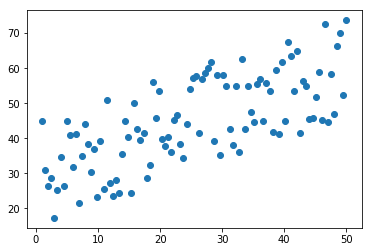

In [6]:
plt.scatter(X, Y)

# Determining Gradients

Lets define a Square loss function as, where $Y$ is the real value and $mx + b$ or $\hat{Y}$ is the predicted value and $n$ is the number of points in the data

$$L = \sum_{i=0}^{n}{(Y_i - mx_i - b)^2}$$

then the partial differntials with respect to $m$ and $b$ are the following

$$\frac{\delta L}{\delta m} = \sum_{i=0}^{n}{2x_i (b + mx_i - Y_i)}$$

and

$$\frac{\delta L}{\delta b} = \sum_{i=0}^{n}{2(b + mx_i - Y_i)}$$

the two functions can be re-written as 

$$\frac{\delta L}{\delta m} = \sum_{i=0}^{n}{2x_i (\hat{Y_i} - Y_i)}$$

$$\frac{\delta L}{\delta b} = \sum_{i=0}^{n}{2(\hat{Y_i} - Y_i)}$$

#### you can find partial derivatives for virutally any function that you can think of using https://www.wolframalpha.com/examples/math/calculus/

In [7]:
def get_linear_gradients_mse(X, Y, Y_hat):
    """
    returns gradients for the two variables m and b assuming mean square error
    for a linear equation y = mx + b
    """
    # dL/dm
    m_gradient = np.sum(2*X*(Y_hat - Y))/len(Y) ### Try removing the normalization factor len(Y)
    # dL/db
    b_gradient = np.sum(2*(Y_hat - Y))/len(Y)
    return m_gradient, b_gradient

# Minimization

Estimates after 10000 iterations: m = 0.617472729424, b = 29.2931253201


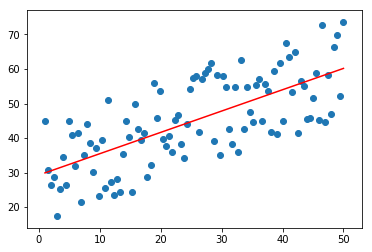

In [8]:
# Initial Values
m = 5
b = 10
# Learning rate
alpha = 0.001
# Number of iterations
N = 10000
for i in range(N):
    Y_hat = get_linear_y_values(X, m, b)
    m_grad, b_grad = get_linear_gradients_mse(X, Y, Y_hat)
    # update m and b for the next iteration
    m = m - alpha * m_grad
    b = b - alpha * b_grad
# The final value of 
plt.plot(X, get_linear_y_values(X, m, b), 'r')
plt.scatter(X, Y)
print "Estimates after {} iterations: m = {}, b = {}".format(N, m, b)

You can play around with the `initial values`, `learning rate`, `number of iterations` etc 
to get an idea of how gradient descent works in practice. 

# Assignment

1. Generate some noisy data for any other function that is not a straight line.
2. Write a python function for returning gradients for the variables. Use WolframAlpha generously here.
3. Iterate to minimize your loss and finally plot the fitted curve.

# Extra Credit

1. Write one other python function that calculates and returns the gradients for $m$ and $b$ using a different loss function. Hint: Use google here

2. Iterate to minimize your loss and finally plot the fitted curve.